In [4]:
!pip install pmdarima 
!pip install arch
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import scipy
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()
print("done")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


done


In [3]:
raw_data = yfinance.download (tickers = "WMT", start = "2014-01-01", 
                              end = "2020-05-05", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)
print("done")

[*********************100%***********************]  1 of 1 completed
done


In [4]:
df_comp = raw_data.copy()
print("done")

done


In [0]:
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [6]:
print(type(df_comp))
df_comp.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,67.172997,67.812983,66.985266,67.335129,6878000.0
2014-01-03,67.249785,67.522846,67.002323,67.113258,4957400.0
2014-01-06,67.292457,67.335125,66.379410,66.737801,7280200.0
2014-01-07,66.703692,67.283947,66.490363,66.942619,5012300.0
2014-01-08,66.985263,66.993798,66.217278,66.413544,5955200.0


In [0]:
#Splitting data
size = int(len(df_comp)*0.8)
df_train, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

Fitting a Model

In [0]:
#ARIMA
model_wmt_100 = ARIMA(df_train.Close, order = (1,0,0))
results_wmt_100 = model_wmt_100.fit()

In [2]:
#ARIMA (5,1,0)
model_wmt500 = ARIMA(df_train.Close, order = (5,1,5))
results_wmt500 = model_wmt500.fit()

NameError: ignored

## Simple Forecasting

In [3]:
df_train.tail()

NameError: ignored

In [0]:
df_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-28,93.784483,94.309126,93.347285,94.299408,5875800.0
2019-01-29,94.017665,94.396579,93.765065,93.959373,5253400.0
2019-01-30,93.930225,94.046815,91.579057,92.103699,11849300.0
2019-01-31,91.938519,94.114814,91.938519,93.104393,14723000.0
2019-02-01,93.191844,93.269571,90.461769,91.190437,12591900.0


In [0]:
df_test.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-28,127.718187,129.669610,127.140726,127.439415,6910700.0
2020-04-29,125.020059,125.209229,122.013288,123.058685,14870700.0
2020-04-30,122.540968,122.899392,120.509901,121.017670,13499300.0
2020-05-01,120.947972,123.148292,120.251033,122.381660,10381300.0
2020-05-04,123.297628,123.855180,121.176959,123.158241,5935900.0


In [0]:
start_date = "2019-01-28"
end_date = "2020-05-04"

In [0]:
end_date = "2020-05-04"
df_pred_100 = results_wmt_100.predict(start = start_date, end = end_date)

In [0]:
end_date = "2020-05-04"
df_pred_500 = results_wmt500.predict(start = start_date, end = end_date)

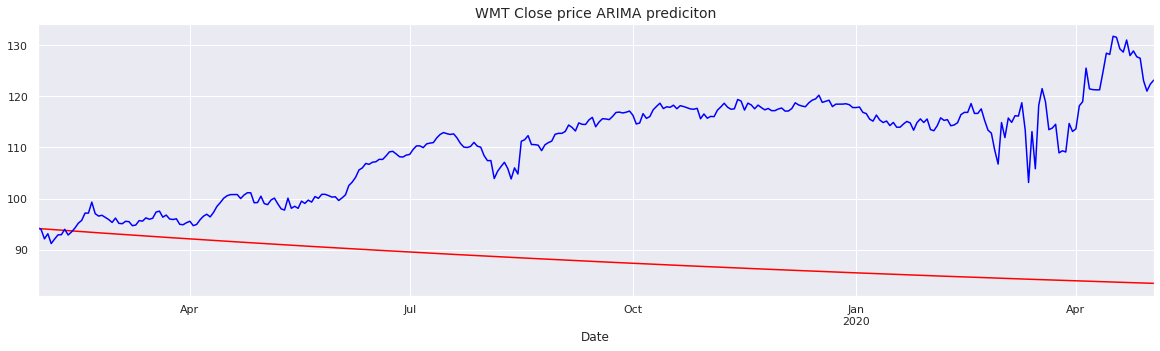

In [0]:
df_pred_100[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.Close[start_date:end_date].plot(color = "blue")
plt.title("WMT Close price ARIMA prediciton", size = 14)
plt.show()

In [0]:
df_test.shape

(331, 5)

In [0]:
RMSE_501 = rmse(df_test.Close,df_pred_500)

In [0]:
print("RMSE(5,1,0) %.5f" %rmse(df_test.Close,df_pred_500))


RMSE(5,1,0) 88.95573


In [0]:
print("MSE %.5f" %mse(df_test.Close,df_pred_500))

MSE 7913.12193


In [0]:
RMSE_100 = rmse(df_test.Close,df_pred_100)

In [0]:
print("RMSE(1,0,0) %.5f" %rmse(df_test.Close,df_pred_100))

RMSE(1,0,0) 88.00969


In [0]:
print("MSE %.5f" %mse(df_test.Close,df_pred_100))

MSE 7745.70616


In [0]:
df_comp['Close'] = df_comp.Close.pct_change(1).mul(100)


In [0]:
df_test.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-28,127.718187,129.669610,127.140726,-0.233831,6910700.0
2020-04-29,125.020059,125.209229,122.013288,-3.437500,14870700.0
2020-04-30,122.540968,122.899392,120.509901,-1.658571,13499300.0
2020-05-01,120.947972,123.148292,120.251033,1.127101,10381300.0
2020-05-04,123.297628,123.855180,121.176959,0.634557,5935900.0


In [0]:
end_date = "2020-05-04"

model_ret_ar = ARIMA(df_train.Close[1:], order = (5,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start = start_date, end = end_date) 

df_pred_ar[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.Close[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [1]:
print("RMSE(1,0,0) %.5f" %rmse(df_test.Close,df_pred_ar))

NameError: ignored